<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_MachineLearning/blob/main/Tarea2_CarolinaHerreraAzolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instrucciones


- Tipo de actividad: Individual
- Tipo de evaluación: Sumativa (con calificación)
- Ponderación: 10% (Equivale al 10% de la nota final del curso)
- Puntaje: 30 puntos

1. Antes de comenzar, debes haber revisado todo el material de los módulos 1 y 2 del curso.

2. Descarga el siguiente archivo Jupyter Notebook (base_tarea2), que servirá de base para realizar la tarea. En él podrás encontrar dos celdas de código. La primera consiste en la declaración de una función que genera espirales en un espacio bidimensional. La segunda celda crea un conjunto de datos de referencia con 4 espirales con ciertas características particulares, donde cada una corresponde a una categoría diferente.
3. Como primera actividad de la tarea deberás dividir el conjunto de datos en subconjuntos de entrenamiento y prueba, utilizando la función train_test_split de sklearn, con una proporción adecuada para cada uno, dado el tamaño del conjunto de datos.

4. Entrena al menos 3 modelos basados en las técnicas cubiertas en el módulo 2 del curso. Para cada una, obtenga su rendimiento en los conjuntos de entrenamiento y prueba y comente sobre el nivel de sobreajuste exhibido, en función de la comparación entre modelos.

5. Visualiza las superficies de decisión de cada uno de los modelos entrenados, utilizando el esquema presentado en los tutoriales, e identifique los sectores del espacio de características donde se aprecie sobreajuste. Comente sobre las características de estos sectores para cada modelo.

6. Realiza un análisis de sensibilidad de los modelos con respecto a las características de los datos. Para esto, modifique el conjunto de datos utilizando los parámetros que recibe la función que genera espirales. Específicamente, estudie el efecto del ruido y de la forma de las espirales.

In [2]:
import numpy as np
from numpy import pi

def generate_spiral(a, b, N, noise_factor=0):

    theta = np.sqrt(np.random.rand(N))*4*pi
    r = a + b*theta
    x = np.array([np.cos(theta)*r, np.sin(theta)*r]).T
    x += np.expand_dims(noise_factor*r,1)*np.random.randn(N,2)
    return x

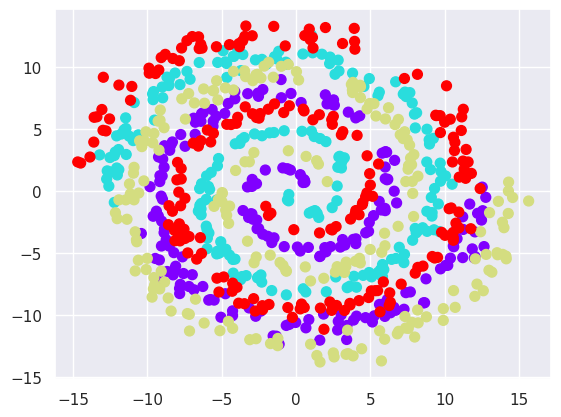

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

N = 200
a = 1.75
b = 1
noise_factor = 0.05

x1 = generate_spiral(0,b,N,noise_factor)
x2 = generate_spiral(0,-b,N,noise_factor)
x3 = generate_spiral(a,b,N,noise_factor)
x4 = generate_spiral(-a,-b,N,noise_factor)

X = np.concatenate((x1,x2,x3,x4),axis=0)
Y = np.ravel(np.concatenate((np.zeros((N,1)),np.ones((N,1)),2*np.ones((N,1)),3*np.ones((N,1))), axis=0))


plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow');
plt


**Resolución Pregunta 3.** Como primera actividad de la tarea deberás dividir el conjunto de datos en subconjuntos de entrenamiento y prueba, utilizando la función train_test_split de sklearn, con una proporción adecuada para cada uno, dado el tamaño del conjunto de datos.

In [13]:
# Incorporación de librerías
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# División de datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Visualizar el tamaño de cada conjunto
print("Conjunto para datos de entrenamiento:", X_train.shape)
print("Conjunto para datos de prueba:", X_test.shape)

Conjunto para datos de entrenamiento: (560, 2)
Conjunto para datos de prueba: (240, 2)


**Resolución Pregunta 4. **. Entrena al menos 3 modelos basados en las técnicas cubiertas en el módulo 2 del curso. Para cada una, obtenga su rendimiento en los conjuntos de entrenamiento y prueba y comente sobre el nivel de sobreajuste exhibido, en función de la comparación entre modelos.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

# Creación de los modelos
arbolDecision = DecisionTreeClassifier(random_state=42)
randomForest = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Entrenamiento de los modelos
arbolDecision.fit(X_train, Y_train)
randomForest.fit(X_train, Y_train)
bagging.fit(X_train, Y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [15]:
# Modelos en conjunto de entrenamiento
train_acc_tree = accuracy_score(Y_train, arbolDecision.predict(X_train))
train_acc_rf = accuracy_score(Y_train, randomForest.predict(X_train))
train_acc_bagging = accuracy_score(Y_train, bagging.predict(X_train))

# Modelos en conjunto de prueba
test_acc_tree = accuracy_score(Y_test, arbolDecision.predict(X_test))
test_acc_rf = accuracy_score(Y_test, randomForest.predict(X_test))
test_acc_bagging = accuracy_score(Y_test, bagging.predict(X_test))

# Resultados
print("Árbol de Decisión - Precisión entrenamiento:", train_acc_tree, "Precisión prueba:", test_acc_tree)
print("Random Forest - Precisión entrenamiento:", train_acc_rf, "Precisión prueba:", test_acc_rf)
print("Bagging - Precisión entrenamiento:", train_acc_bagging, "Precisión prueba:", test_acc_bagging)


Árbol de Decisión - Precisión entrenamiento: 1.0 Precisión prueba: 0.7041666666666667
Random Forest - Precisión entrenamiento: 1.0 Precisión prueba: 0.7708333333333334
Bagging - Precisión entrenamiento: 0.9875 Precisión prueba: 0.7416666666666667


**Respuesta P4: **
Del anterior código desprendemos la siguiente información:

- Árbol de Decisión - Precisión en entrenamiento: 1.0; Precisión en prueba: 0.7041666666666667. Esto nos indica que el modelo fue afectado por el sobreajuste: se ajustó bien a los datos de entrenamiento, pero no logró generalizar adecuadamente en los datos nuevos.
- Random Forest - Precisión en entrenamiento: 1.0; Precisión en prueba: 0.7708333333333334. Este modelo muestra un mejor rendimiento en el conjunto de prueba, lo que revela que es menos propenso al sobreajuste en comparación con el árbol de decisión. Esto se debe a que el factor de aleatoriedad permite combinar muchos árboles, encontrando una solución que se ajusta de mejor manera a los datos de prueba.
- Bagging - Precisión en entrenamiento: 0.9875; Precisión en prueba: 0.7416666666666667. Podemos notar que la precisión en prueba es muy levemente menor a la del Random Forest, y también presenta una reducción del sobreajuste en comparación con el árbol de decisión.





**Resolución P5: **

5. Visualiza las superficies de decisión de cada uno de los modelos entrenados, utilizando el esquema presentado en los tutoriales, e identifique los sectores del espacio de características donde se aprecie sobreajuste. Comente sobre las características de estos sectores para cada modelo.

In [18]:
def plot_decision_surface(model, X, Y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_background = plt.get_cmap('rainbow')

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow', edgecolor='k')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


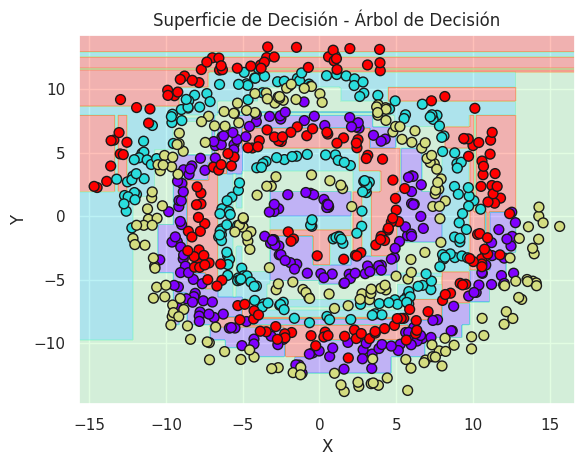

In [20]:
# Superficie de decisión para Árbol de Decisión
plot_decision_surface(arbolDecision, X, Y, title="Superficie de Decisión - Árbol de Decisión")

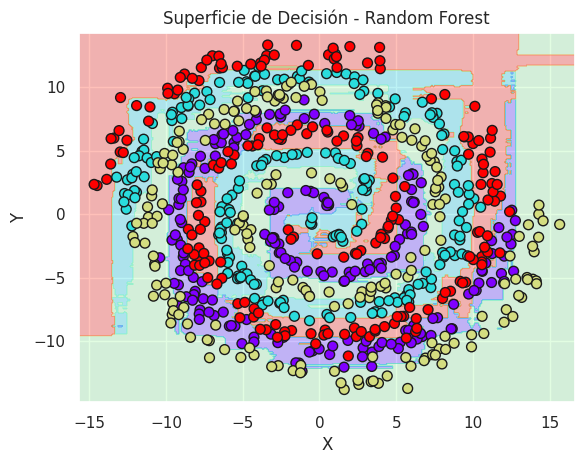

In [21]:
# Superficie de decisión para Random Forest
plot_decision_surface(randomForest, X, Y, title="Superficie de Decisión - Random Forest")

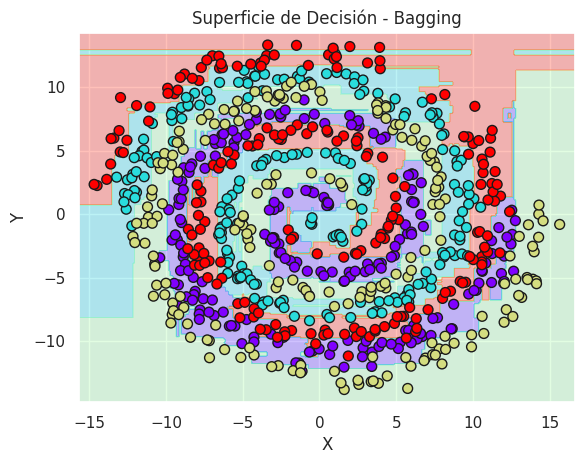

In [22]:
# Superficie de decisión para Bagging
plot_decision_surface(bagging, X, Y, title="Superficie de Decisión - Bagging")